Part A : Finance and Risk Analytics Project  


**Context**

In the realm of modern finance, businesses encounter the perpetual challenge of managing debt obligations effectively to maintain a favorable credit standing and foster sustainable growth. Investors keenly scrutinize companies capable of navigating financial complexities while ensuring stability and profitability. A pivotal instrument in this evaluation process is the balance sheet, which provides a comprehensive overview of a company's assets, liabilities, and shareholder equity, offering insights into its financial health and operational efficiency. In this context, leveraging available financial data, particularly from preceding fiscal periods, becomes imperative for informed decision-making and strategic planning.


**Objective**

A group of venture capitalists want to develop a Financial Health Assessment Tool. With the help of the tool, it endeavors to empower businesses and investors with a robust mechanism for evaluating the financial well-being and creditworthiness of companies. By harnessing machine learning techniques, they aim to analyze historical financial statements and extract pertinent insights to facilitate informed decision-making via the tool. Specifically, they foresee facilitating the following with the help of the tool:

* Debt Management Analysis: Identify patterns and trends in debt management practices to assess the ability of businesses to fulfill financial obligations promptly and efficiently, and identify potential cases of default.
Credit Risk Evaluation: Evaluate credit risk exposure by analyzing liquidity ratios, debt-to-equity ratios, and other key financial indicators to ascertain the likelihood of default and inform investment decisions.
* They have hired you as a data scientist and provided you with the financial metrics of different companies. The task is to analyze the data provided and develop a predictive model leveraging machine learning techniques to identify whether a given company will be tagged as a defaulter in terms of net worth next year. The predictive model will help the organization anticipate potential challenges with the financial performance of the companies and enable proactive risk mitigation strategies.



**Data Dictionary**

The data consists of financial metrics from the balance sheets of different companies. The detailed data dictionary is given below.

Networth Next Year: Net worth of the customer in the next year

Total assets: Total assets of customer

Net worth: Net worth of the customer of the present year

Total income: Total income of the customer

Change in stock: Difference between the current value of the stock and the value of stock in the last trading day

Total expenses: Total expenses done by the customer

Profit after tax: Profit after tax deduction

PBDITA: Profit before depreciation, income tax, and amortization

PBT: Profit before tax deduction

Cash profit: Total Cash profit

PBDITA as % of total income: PBDITA / Total income

PBT as % of total income: PBT / Total income

PAT as % of total income: PAT / Total income

Cash profit as % of total income: Cash Profit / Total income

PAT as % of net worth: PAT / Net worth

Sales: Sales done by the customer

Income from financial services: Income from financial services

Other income: Income from other sources

Total capital: Total capital of the customer

Reserves and funds: Total reserves and funds of the customer

Borrowings: Total amount borrowed by the customer

Current liabilities & provisions: current liabilities of the customer

Deferred tax liability: Future income tax customer will pay because of the current transaction

Shareholders funds: Amount of equity in a company which belongs to shareholders

Cumulative retained profits: Total cumulative profit retained by customer

Capital employed: Current asset minus current liabilities

TOL/TNW: Total liabilities of the customer divided by Total net worth

Total term liabilities / tangible net worth: Short + long term liabilities divided by tangible net worth

Contingent liabilities / Net worth (%): Contingent liabilities / Net worth

Contingent liabilities: Liabilities because of uncertain events

Net fixed assets: The purchase price of all fixed assets

Investments: Total invested amount

Current assets: Assets that are expected to be converted to cash within a year

Net working capital: Difference between the current liabilities and current assets

Quick ratio (times): Total cash divided by current liabilities

Current ratio (times): Current assets divided by current liabilities

Debt to equity ratio (times): Total liabilities divided by its shareholder equity

Cash to current liabilities (times): Total liquid cash divided by current liabilities

Cash to average cost of sales per day: Total cash divided by the average cost of the sales

Creditors turnover: Net credit purchase divided by average trade creditors

Debtors turnover: Net credit sales divided by average accounts receivable

Finished goods turnover: Annual sales divided by average inventory

WIP turnover: The cost of goods sold for a period divided by the average inventory for that period

Raw material turnover: Cost of goods sold is divided by the average inventory for the same period

Shares outstanding: Number of issued shares minus the number of shares held in the company

Equity face value: cost of the equity at the time of issuing

EPS: Net income divided by the total number of outstanding share

Adjusted EPS: Adjusted net earnings divided by the weighted average number of common shares outstanding on a diluted basis during the plan year

Total liabilities: Sum of all types of liabilities

PE on BSE: Company's current stock price divided by its earnings per share


## Step 1: Import Libraries & Load Data

#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV

#### Importing the dataset

In [2]:
# Mounting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 2: Exploratory Data Analysis (EDA)

### Overview of the dataset

In [3]:
# Load Data
df = pd.read_csv("/content/drive/MyDrive/Comp_Fin_Data (1).csv")

df.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


#### Fixing messy column names (containing spaces) for ease of use

In [4]:
df.columns = df.columns.str.replace('as_%_of', 'to')

In [5]:
df.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


#### First, let us check the number of rows (observations) and the number of columns (variables).

In [6]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 4256 
The number of columns (variables) is 51


#### Data types of all variables

In [7]:
# Display dataset shape and info
print(f"Dataset Shape: {df.shape}")
print(df.info())

Dataset Shape: (4256, 51)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          410

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop('Num', axis = 1, inplace = True)

#### Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Networth Next Year,4256.0,1.344741e+03,1.593674e+04,-7.426560e+04,3.975,72.100,3.308250e+02,8.057734e+05
Total assets,4256.0,3.573617e+03,3.007444e+04,1.000000e-01,91.300,315.500,1.120800e+03,1.176509e+06
Net worth,4256.0,1.351950e+03,1.296131e+04,0.000000e+00,31.475,104.800,3.898500e+02,6.131516e+05
Total income,4025.0,4.688190e+03,5.391895e+04,0.000000e+00,107.100,455.100,1.485000e+03,2.442828e+06
Change in stock,3706.0,4.370248e+01,4.369150e+02,-3.029400e+03,-1.800,1.600,1.840000e+01,1.418550e+04
Total expenses,4091.0,4.356301e+03,5.139809e+04,-1.000000e-01,96.800,426.800,1.395700e+03,2.366035e+06
Profit after tax,4102.0,2.950506e+02,3.079902e+03,-3.908300e+03,0.500,9.000,5.330000e+01,1.194391e+05
PBDITA,4102.0,6.059406e+02,5.646231e+03,-4.407000e+02,6.925,36.900,1.587000e+02,2.085765e+05
PBT,4102.0,4.102590e+02,4.217415e+03,-3.894800e+03,0.800,12.600,7.417500e+01,1.452926e+05
Cash profit,4102.0,4.082675e+02,4.143926e+03,-2.245700e+03,2.900,19.400,9.625000e+01,1.769118e+05


In [11]:
# Check missing values
print(df.isnull().sum())

Networth Next Year                                0
Total assets                                      0
Net worth                                         0
Total income                                    231
Change in stock                                 550
Total expenses                                  165
Profit after tax                                154
PBDITA                                          154
PBT                                             154
Cash profit                                     154
PBDITA as % of total income                      79
PBT as % of total income                         79
PAT as % of total income                         79
Cash profit as % of total income                 79
PAT as % of net worth                             0
Sales                                           305
Income from fincial services                   1111
Other income                                   1556
Total capital                                     5
Reserves and

In [12]:

# Identify missing values
missing_counts = df.isnull().sum()

# Define threshold for dropping columns (if >40% missing)
drop_threshold = 0.4 * len(df)

# Drop columns with excessive missing values
cols_to_drop = missing_counts[missing_counts > drop_threshold].index
df.drop(columns=cols_to_drop, inplace=True)

# Fill missing values for numerical columns with median
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing values for categorical columns with mode
cat_cols = df.select_dtypes(exclude=['number']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
# Check missing values
print(df.isnull().sum())

Networth Next Year                             0
Total assets                                   0
Net worth                                      0
Total income                                   0
Change in stock                                0
Total expenses                                 0
Profit after tax                               0
PBDITA                                         0
PBT                                            0
Cash profit                                    0
PBDITA as % of total income                    0
PBT as % of total income                       0
PAT as % of total income                       0
Cash profit as % of total income               0
PAT as % of net worth                          0
Sales                                          0
Income from fincial services                   0
Other income                                   0
Total capital                                  0
Reserves and funds                             0
Borrowings          

In [14]:
# Display dataset shape and info
print(f"Dataset Shape: {df.shape}")
print(df.info())

Dataset Shape: (4256, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 48 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Networth Next Year                           4256 non-null   float64
 1   Total assets                                 4256 non-null   float64
 2   Net worth                                    4256 non-null   float64
 3   Total income                                 4256 non-null   float64
 4   Change in stock                              4256 non-null   float64
 5   Total expenses                               4256 non-null   float64
 6   Profit after tax                             4256 non-null   float64
 7   PBDITA                                       4256 non-null   float64
 8   PBT                                          4256 non-null   float64
 9   Cash profit                                  425

In [15]:
# Check missing values
missing_counts = df.isnull().sum()
print("\nMissing Values:\n", missing_counts[missing_counts > 0])


Missing Values:
 Series([], dtype: int64)


## Univariate Analysis (Distributions & Outliers)

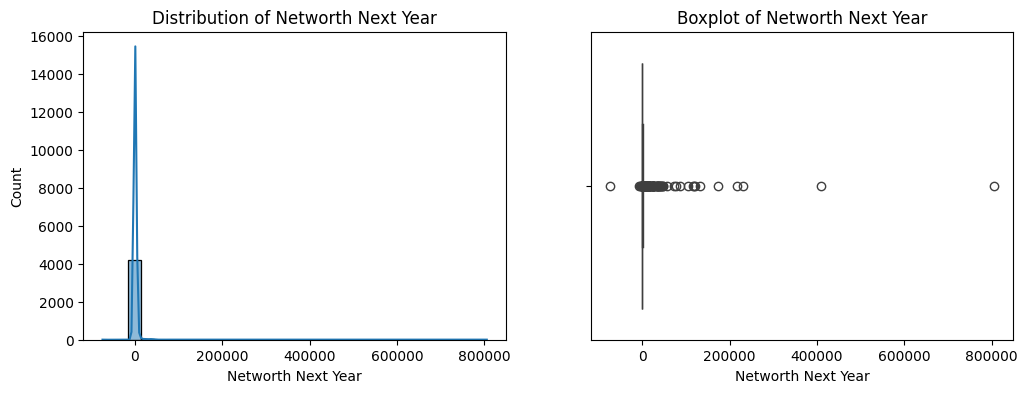

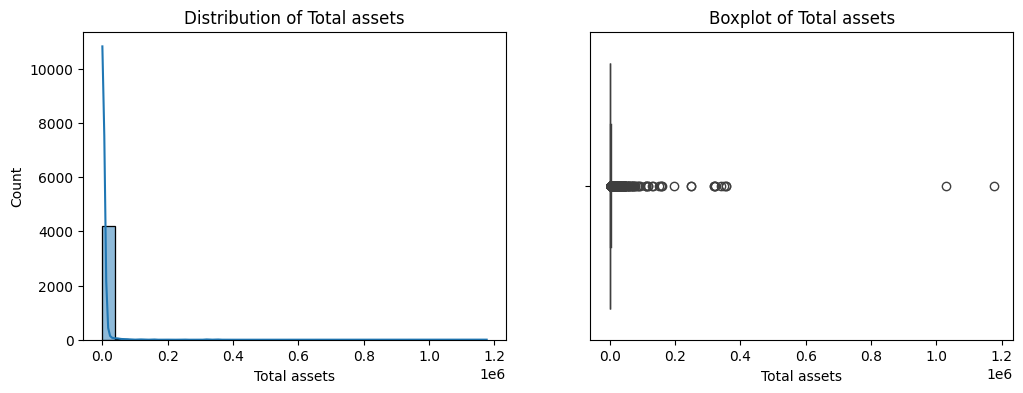

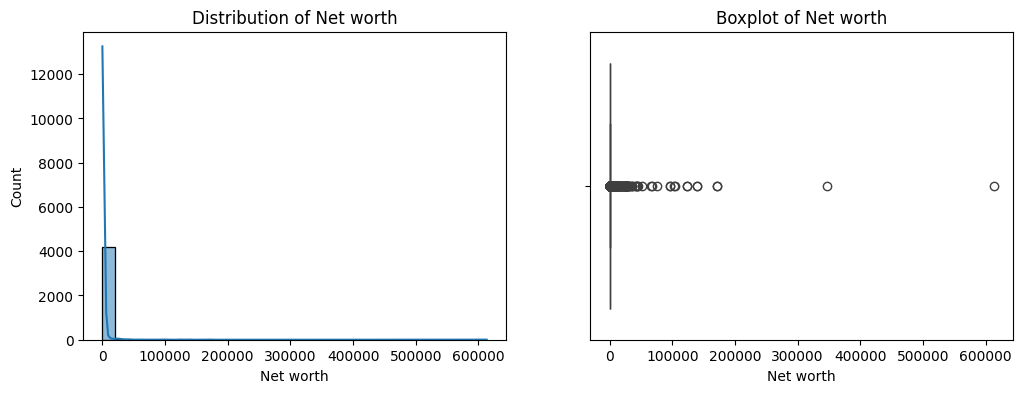

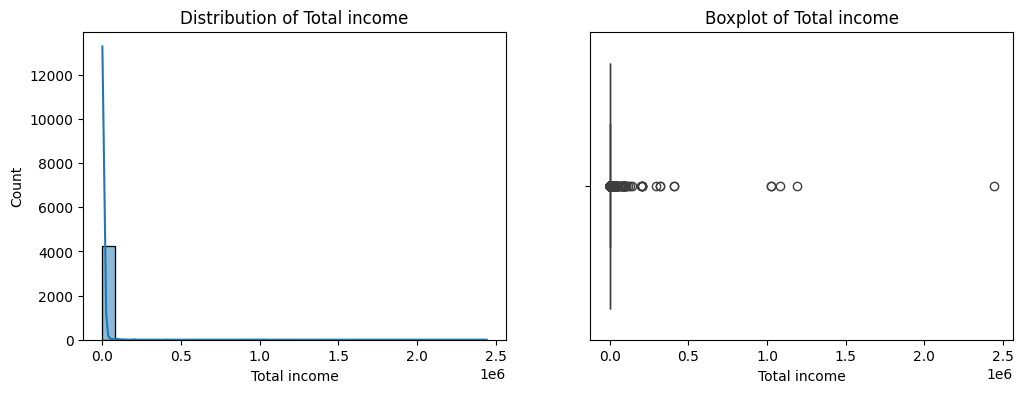

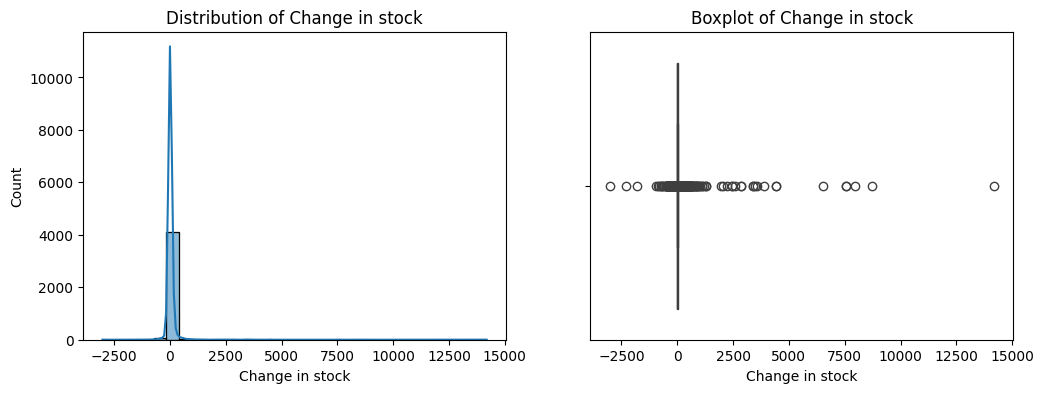

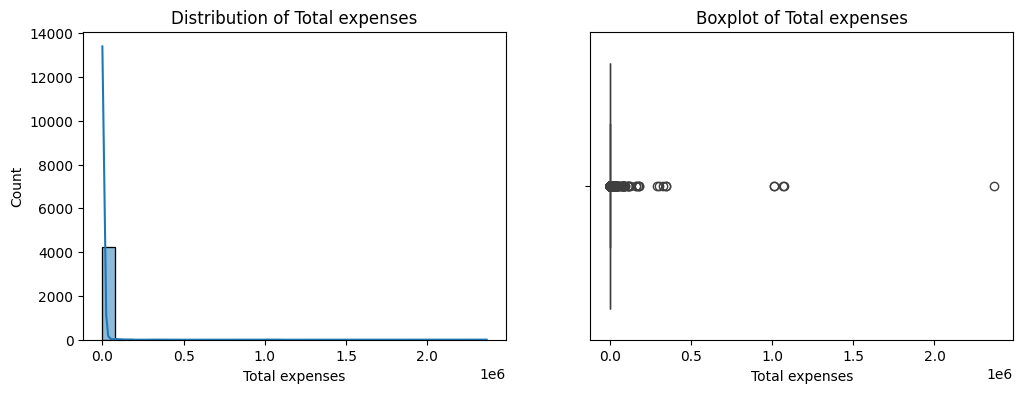

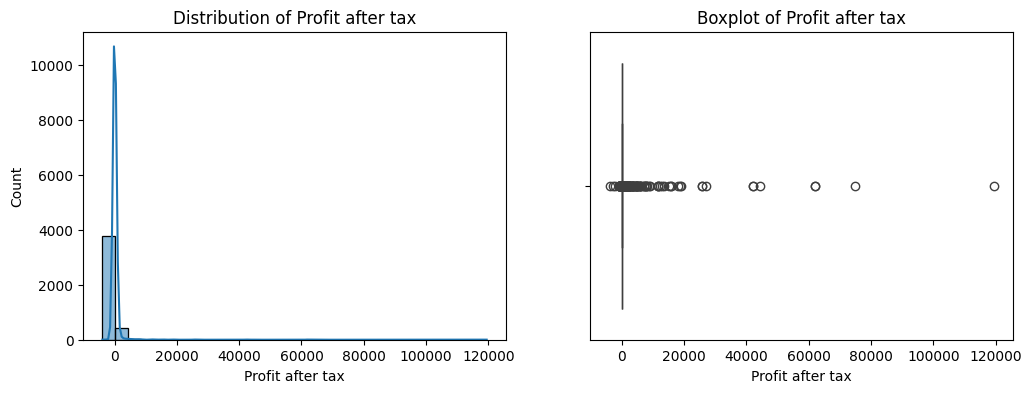

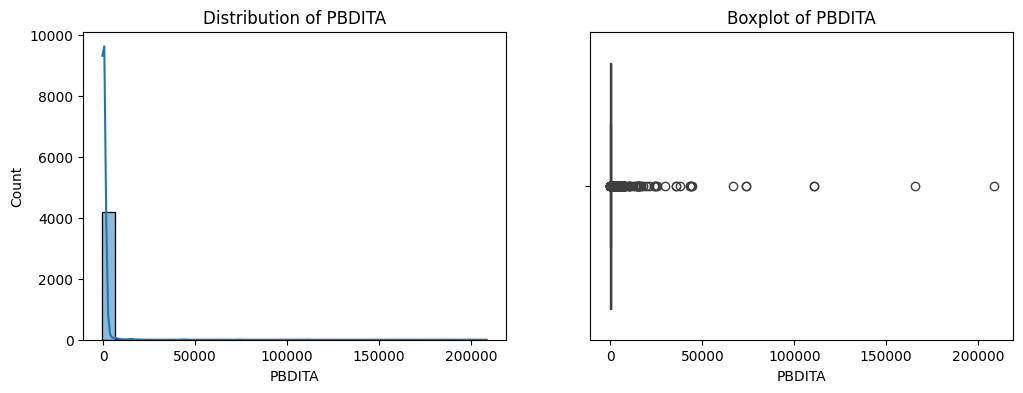

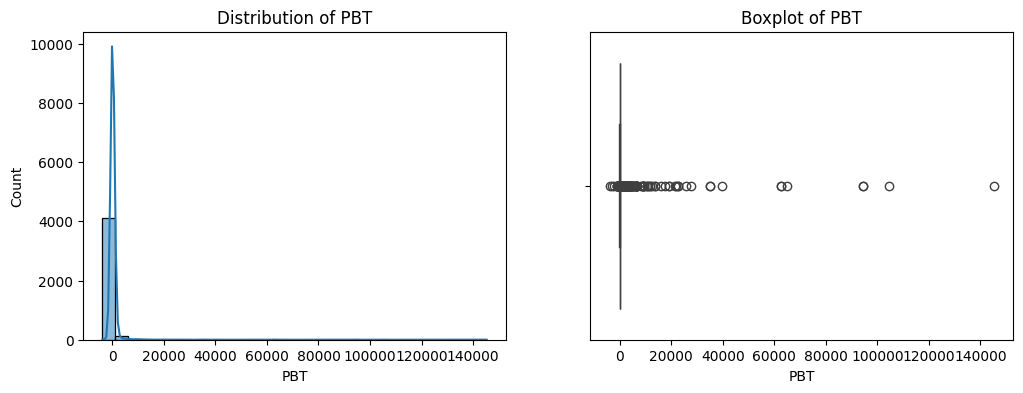

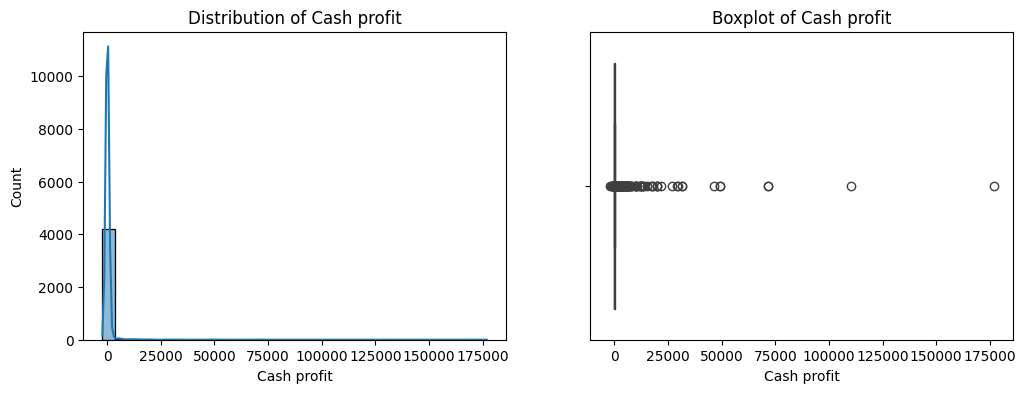

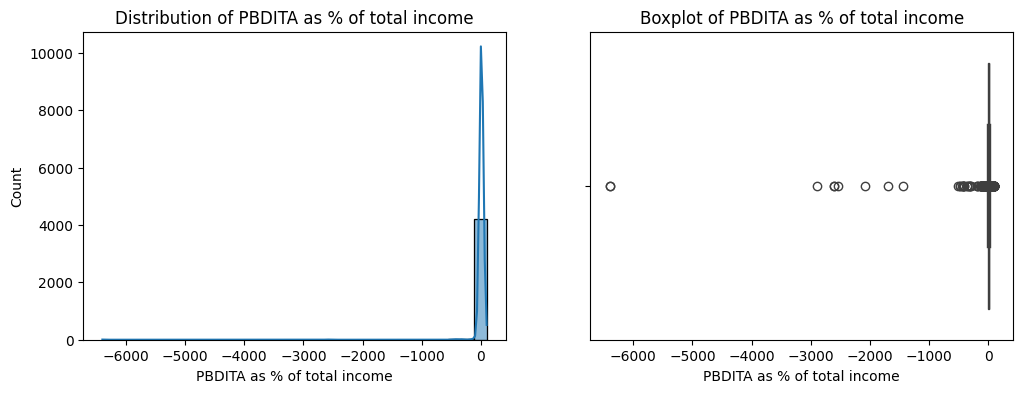

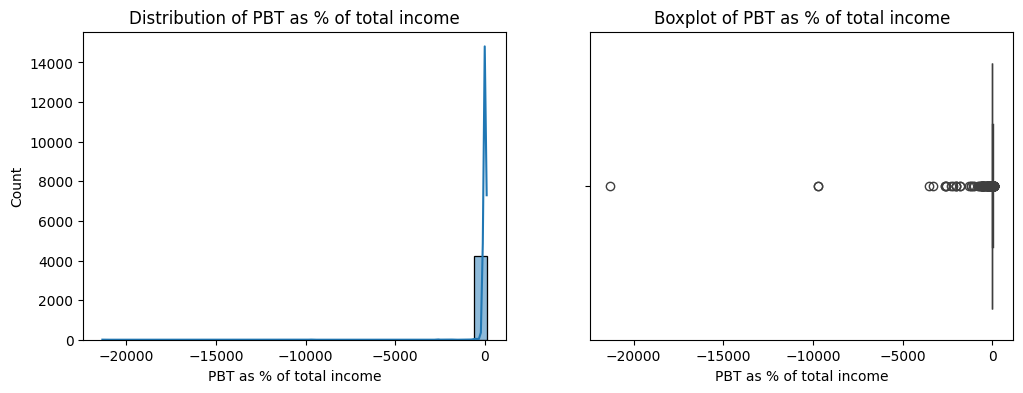

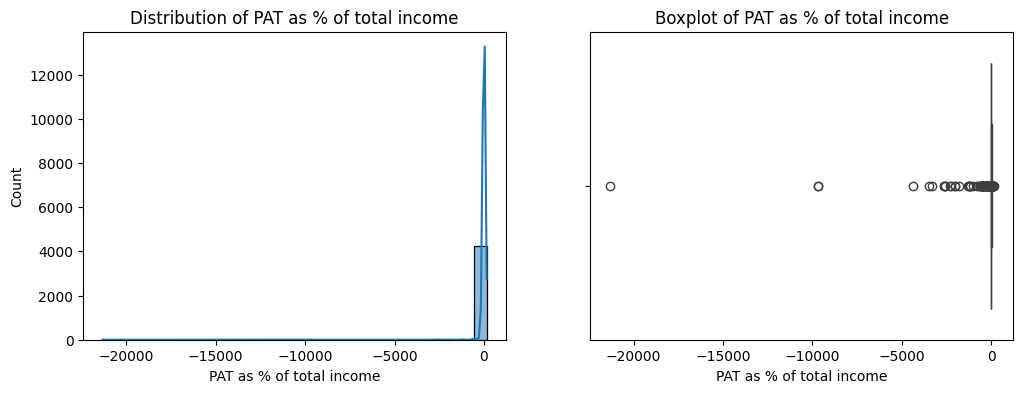

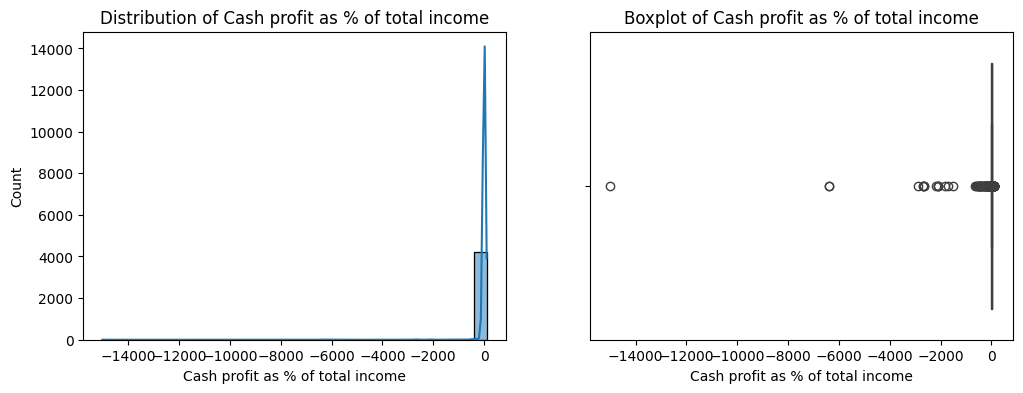

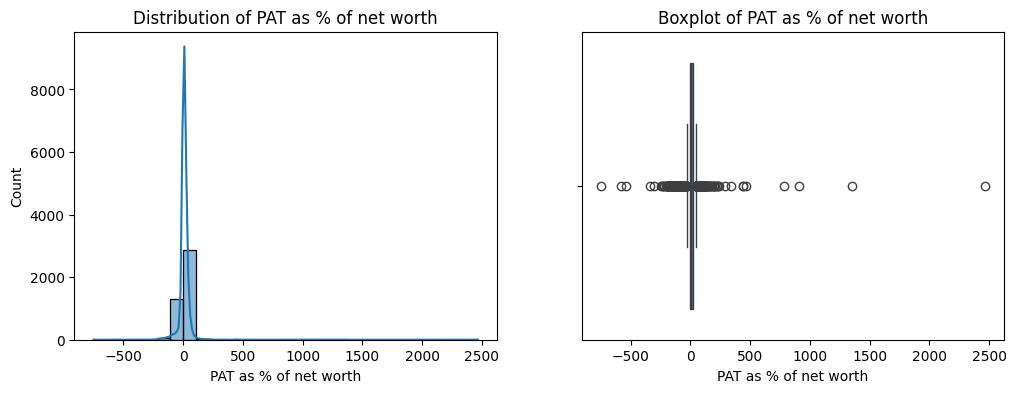

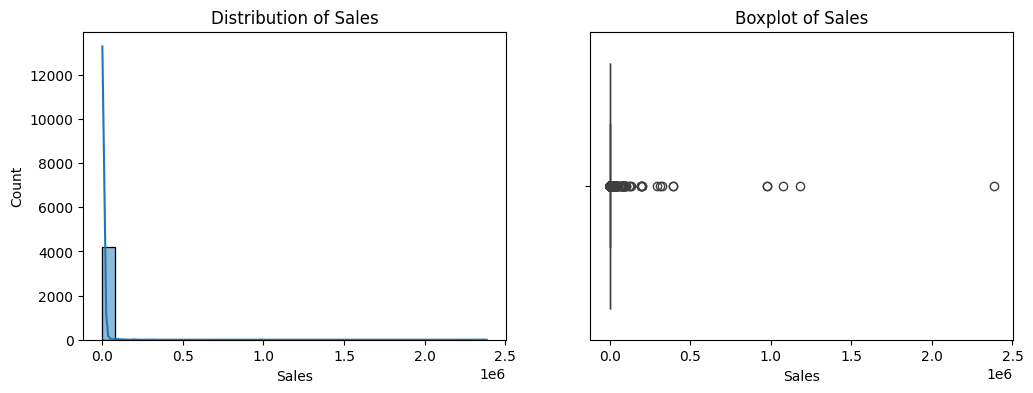

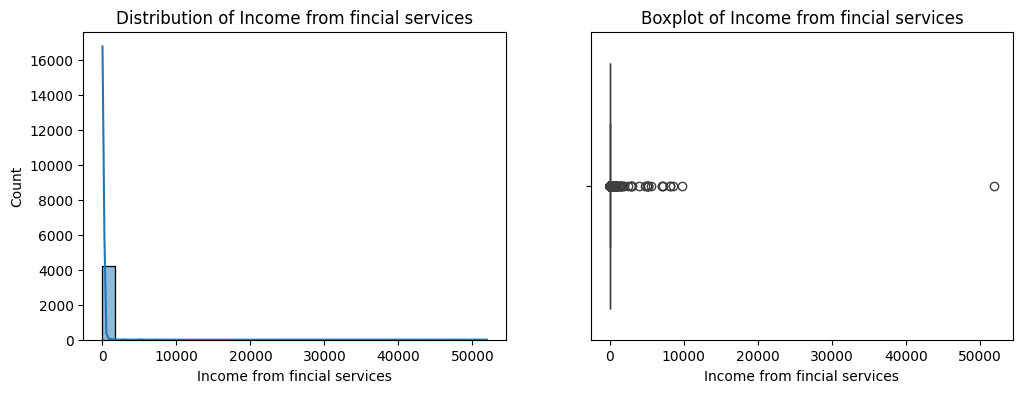

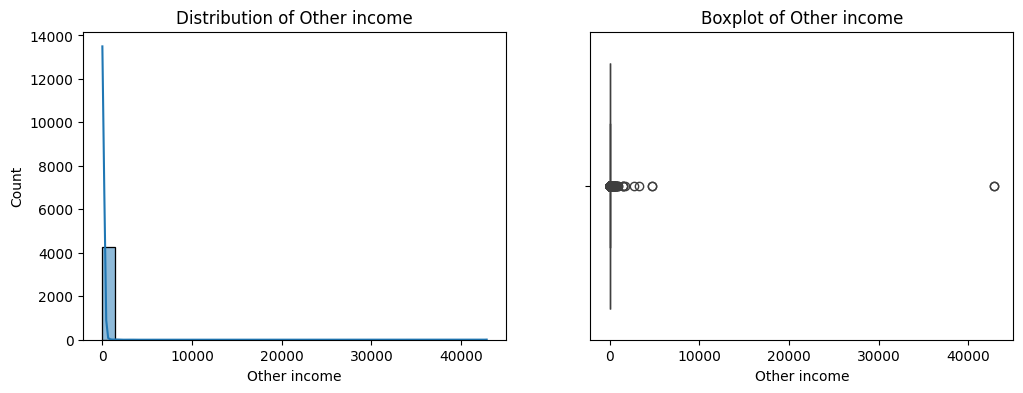

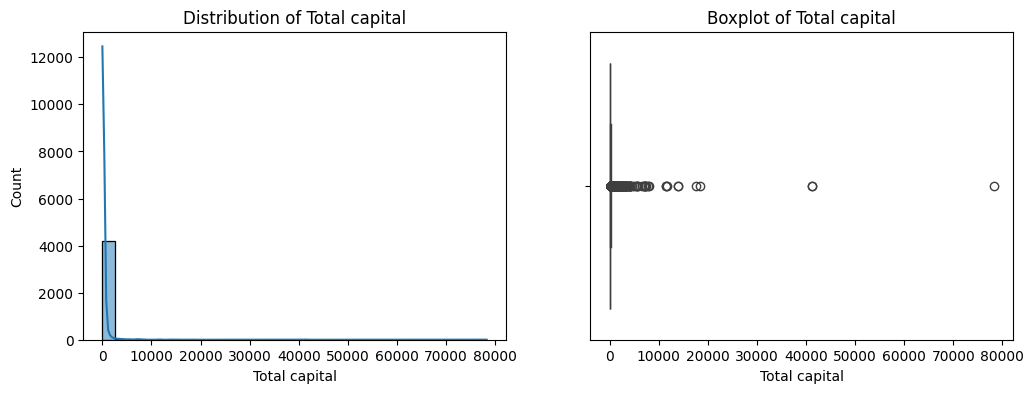

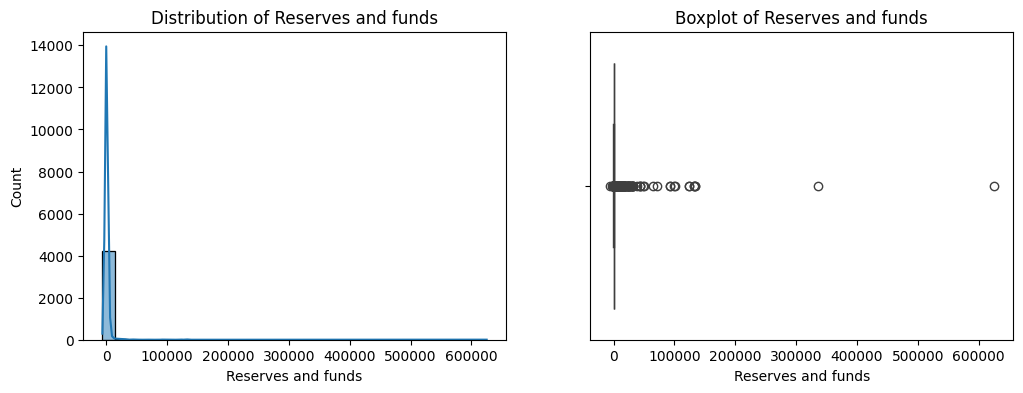

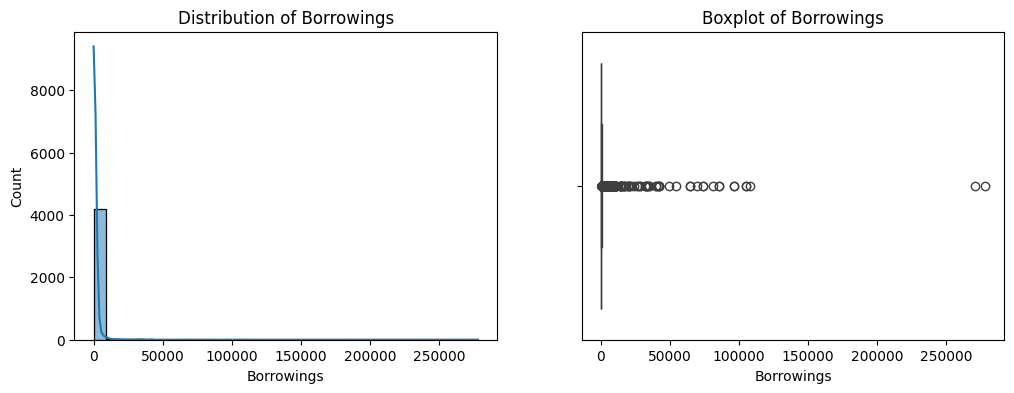

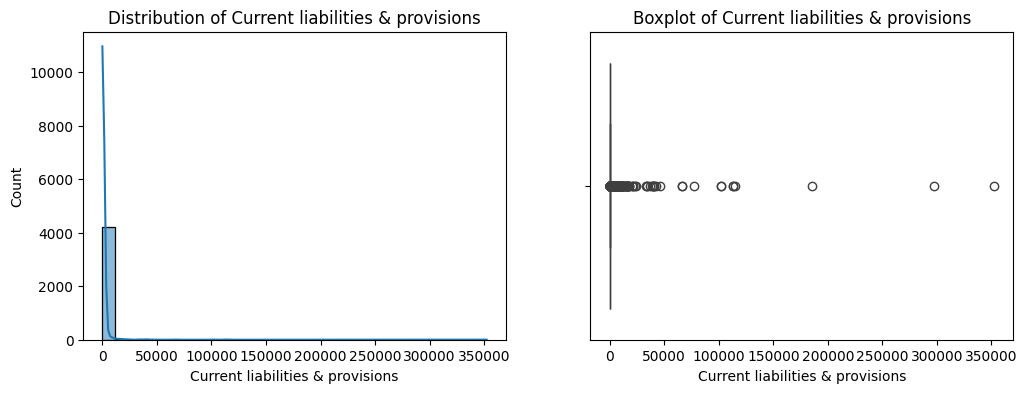

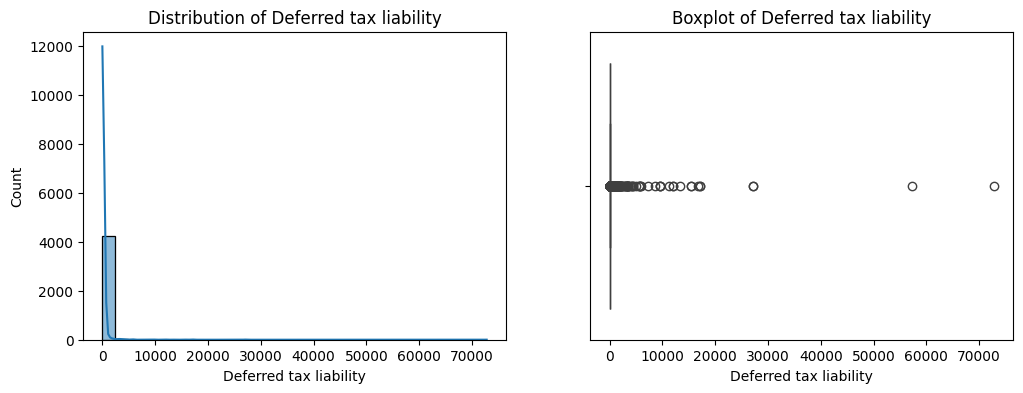

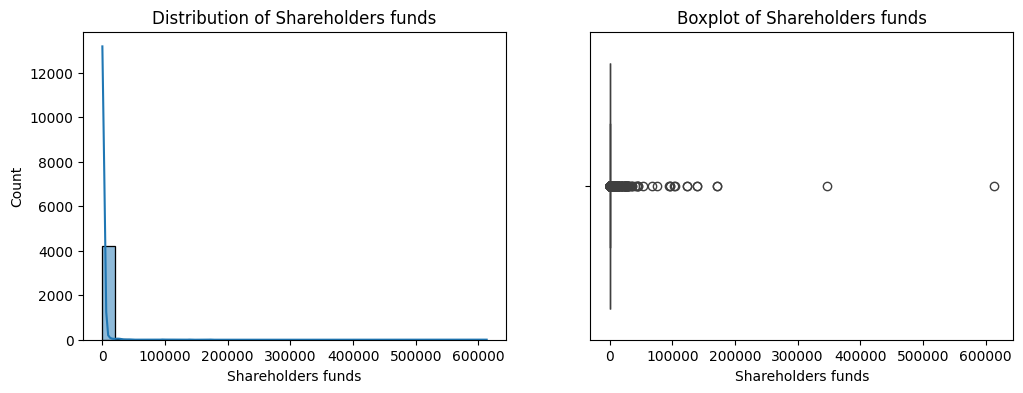

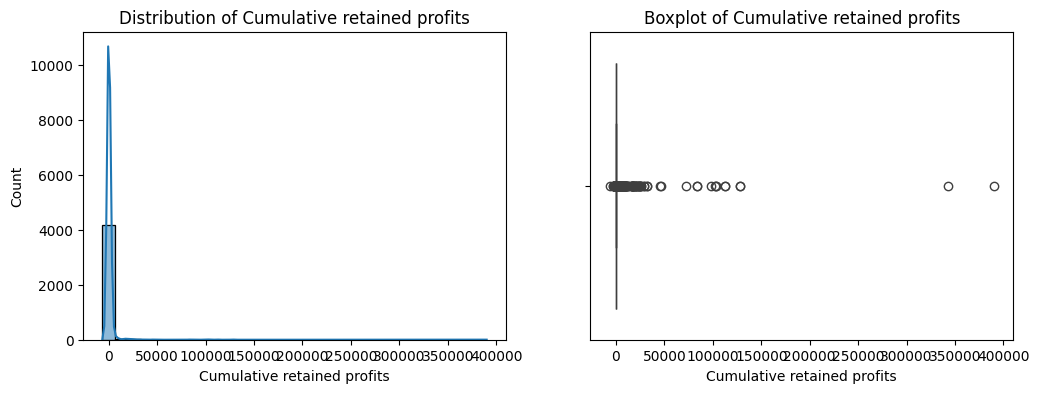

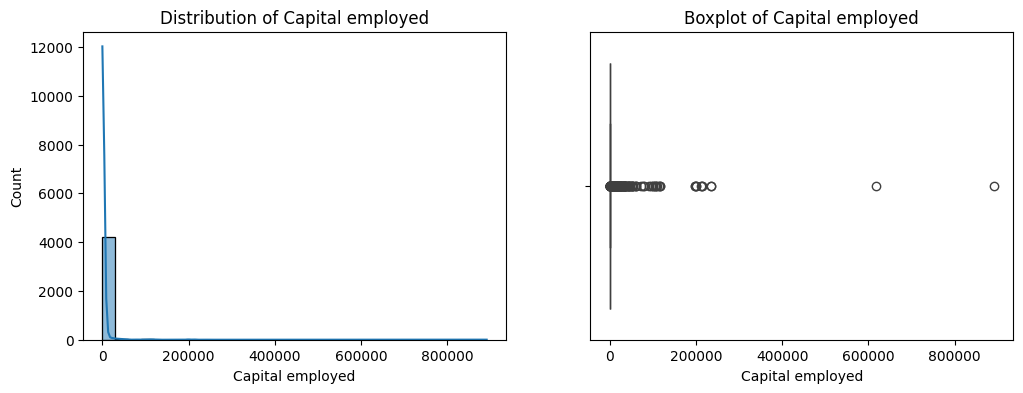

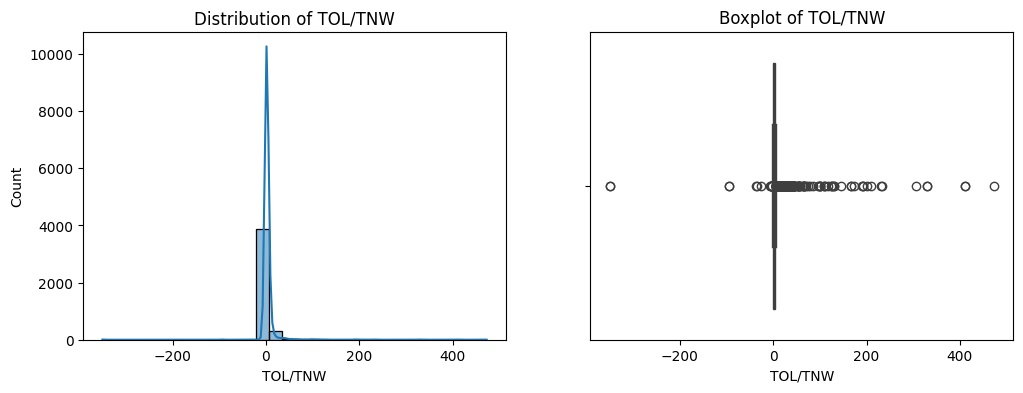

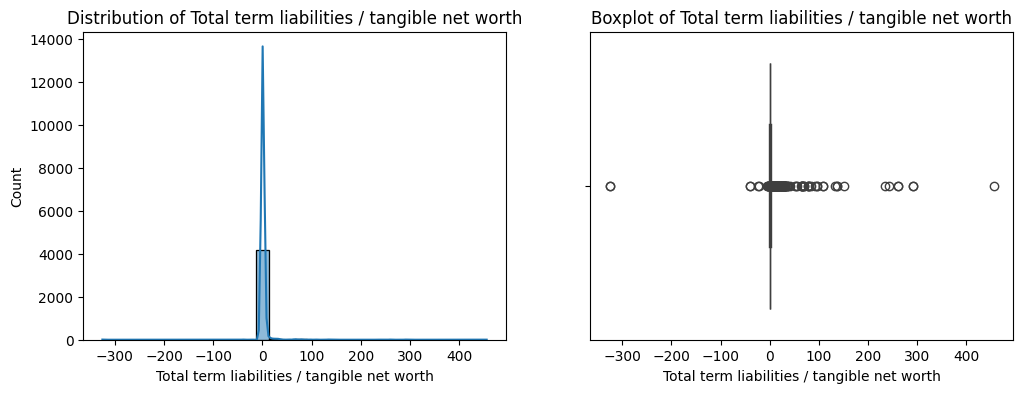

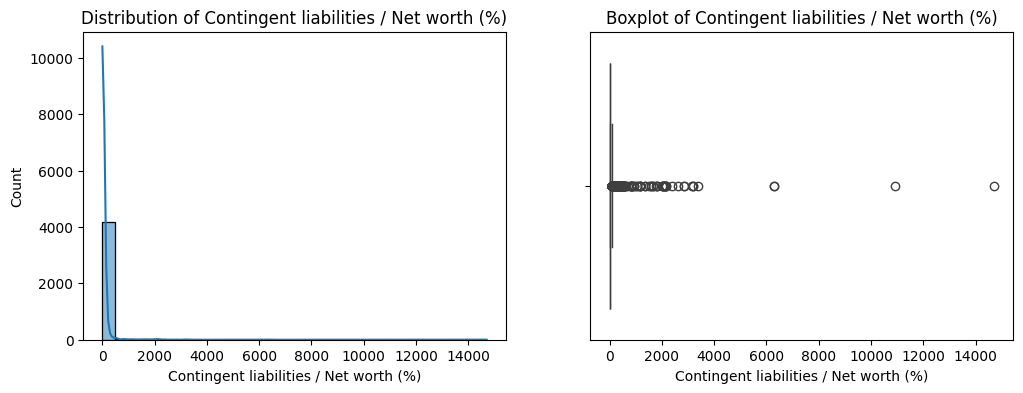

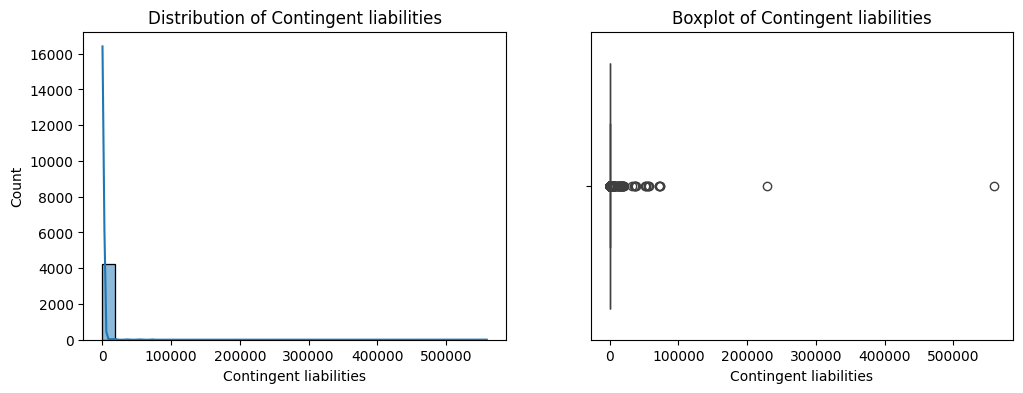

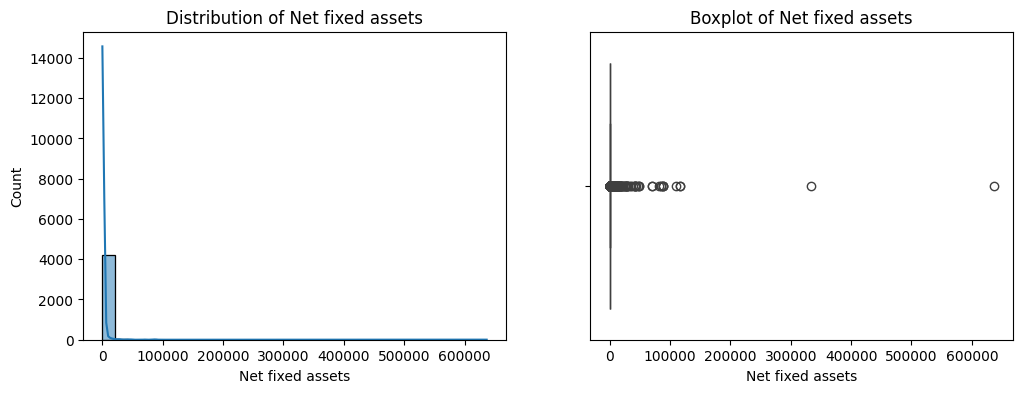

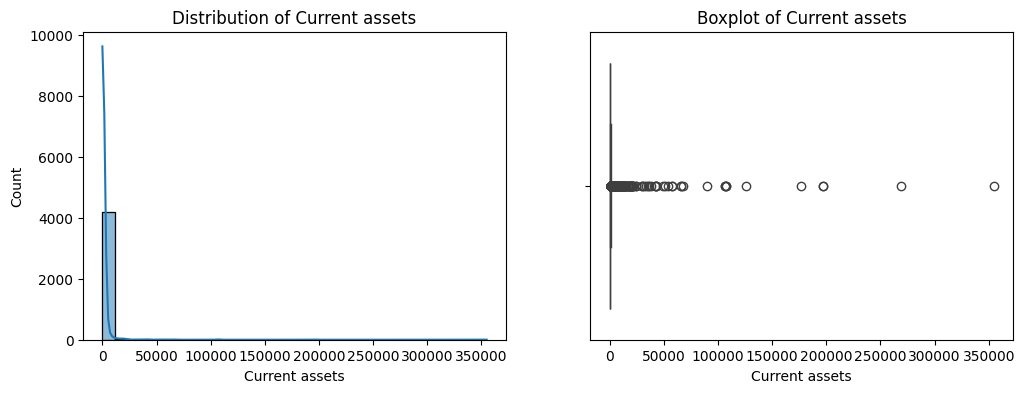

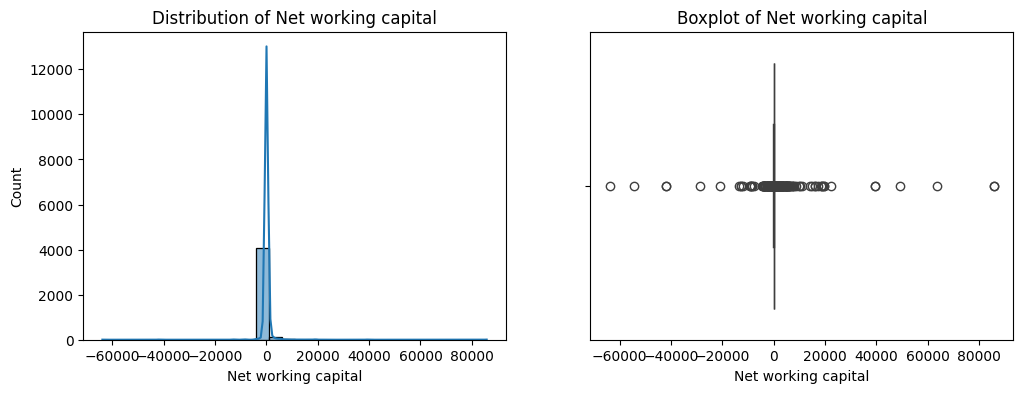

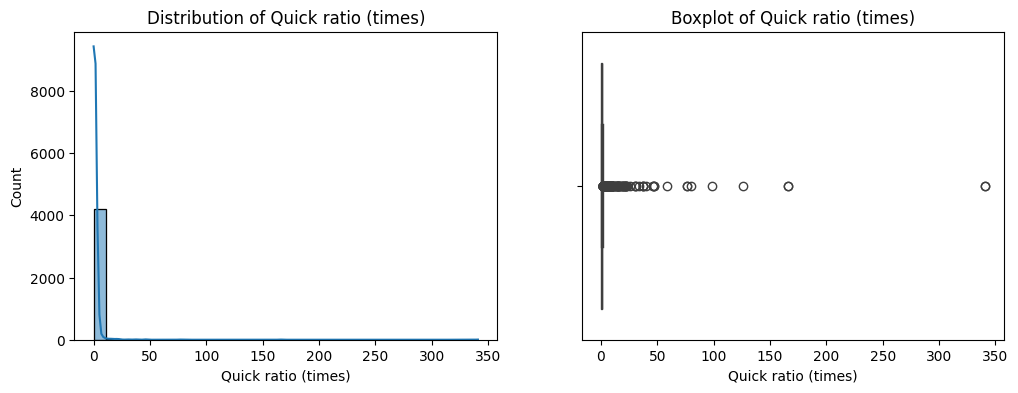

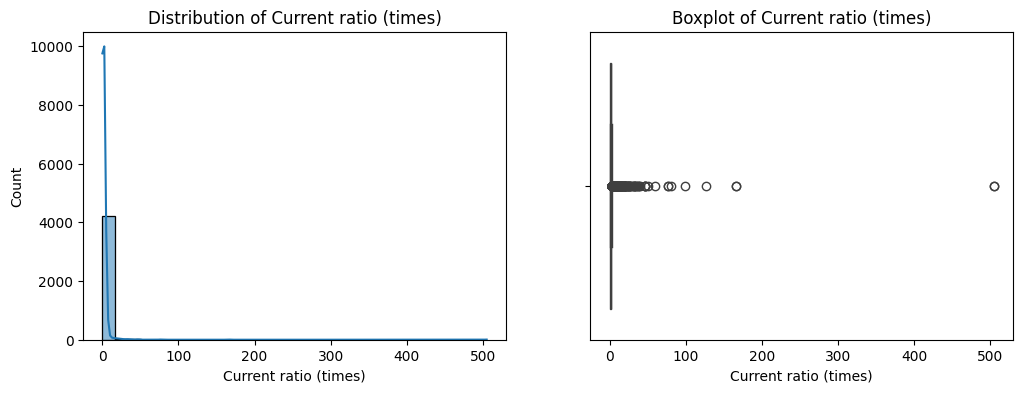

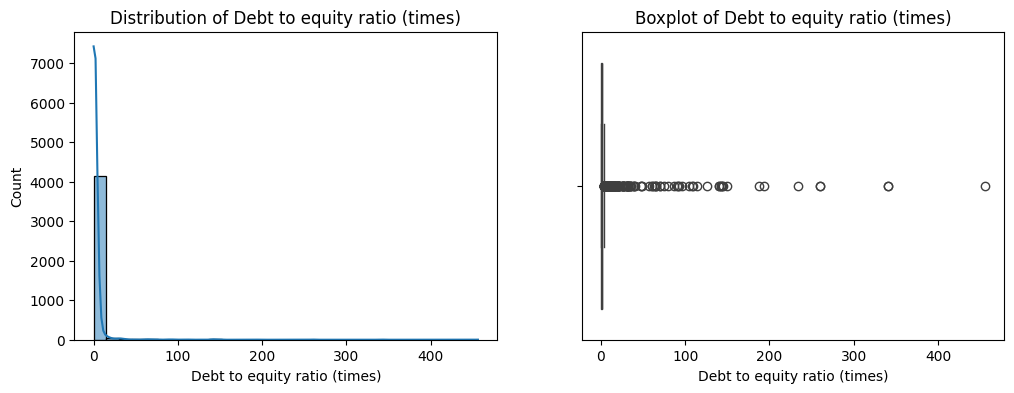

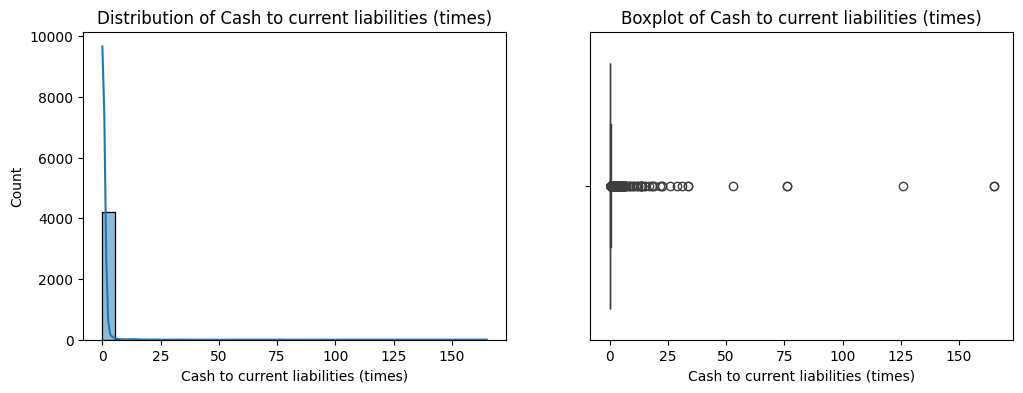

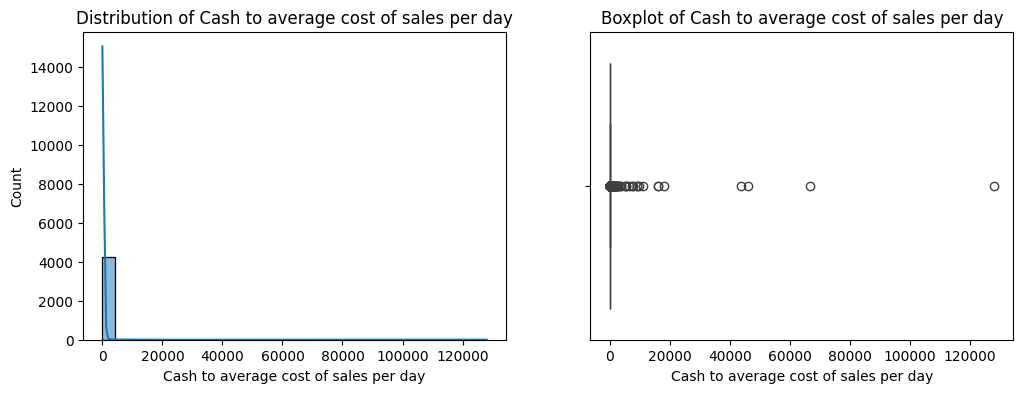

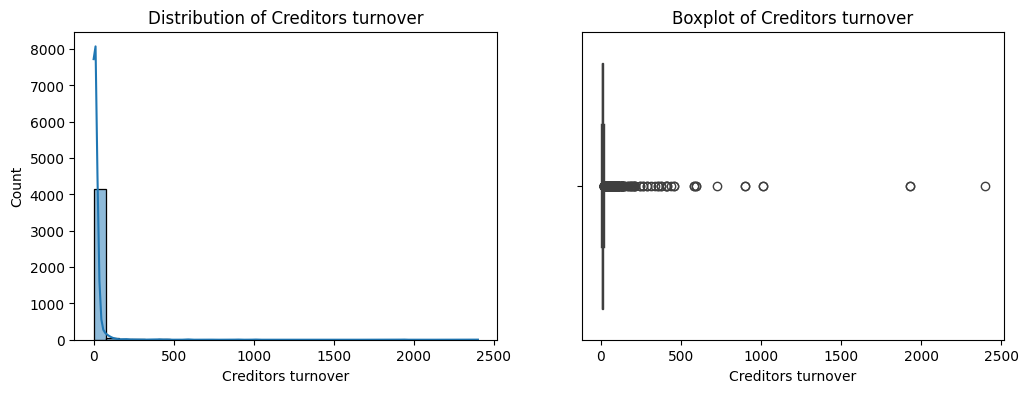

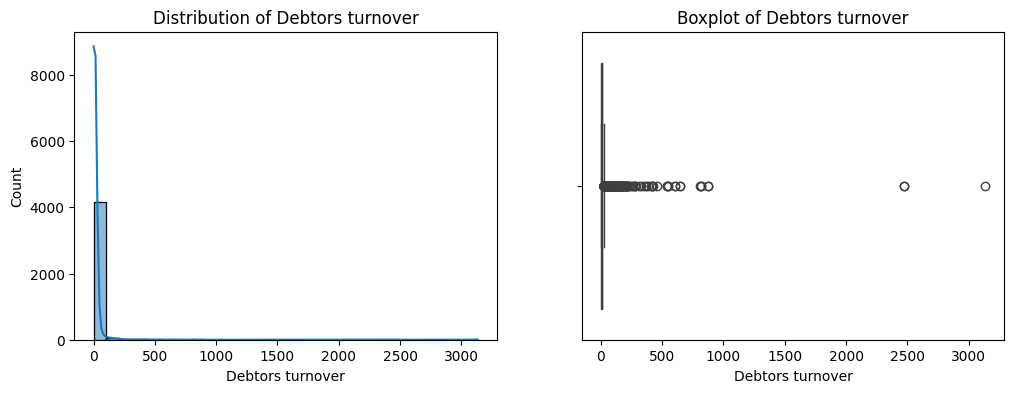

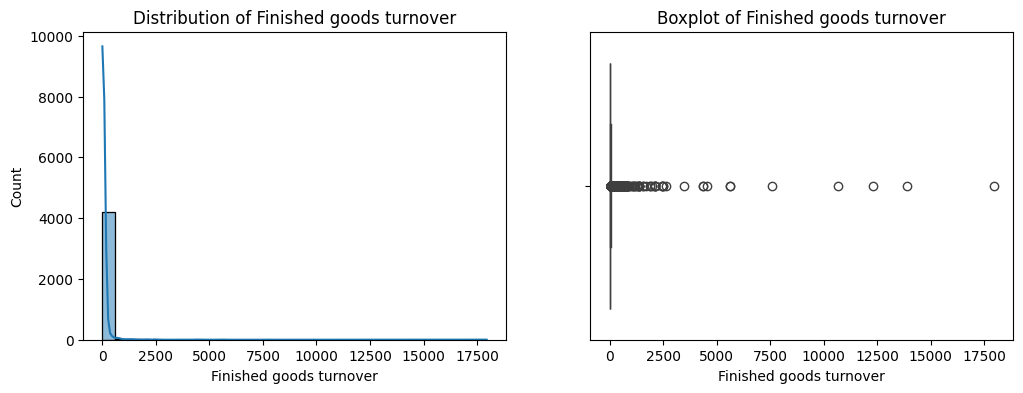

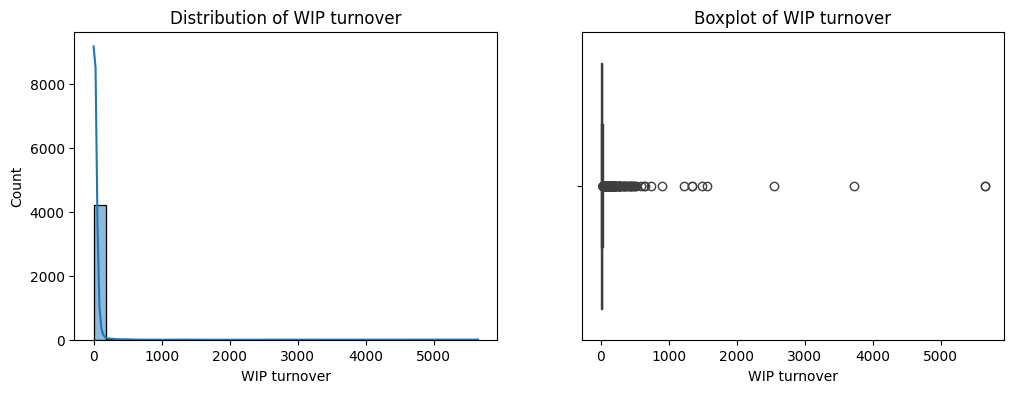

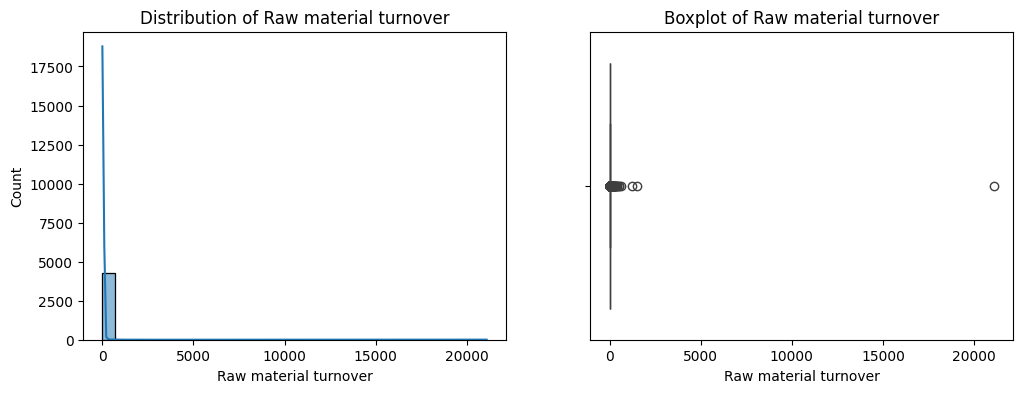

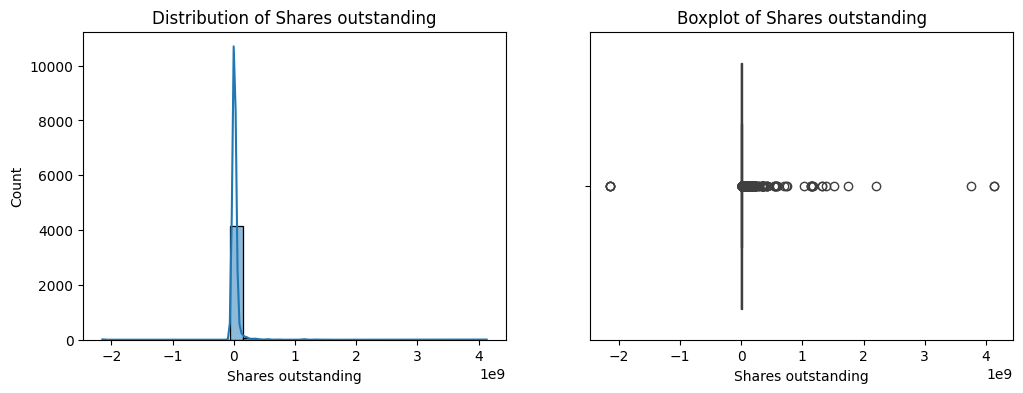

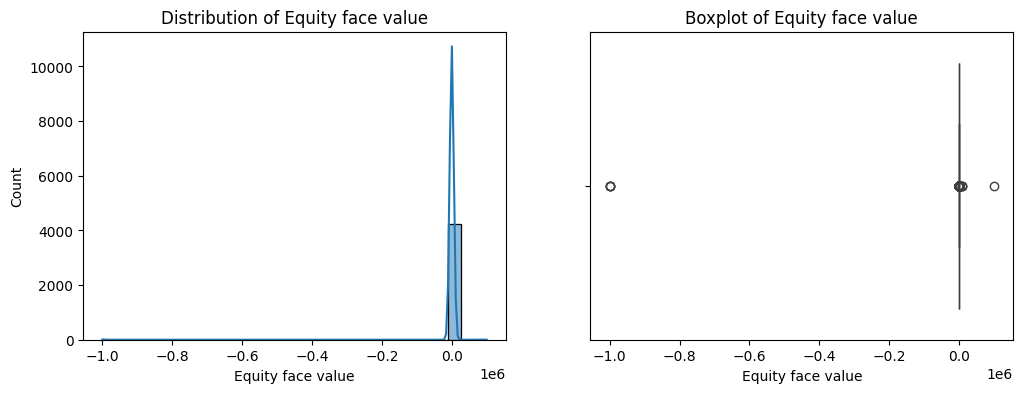

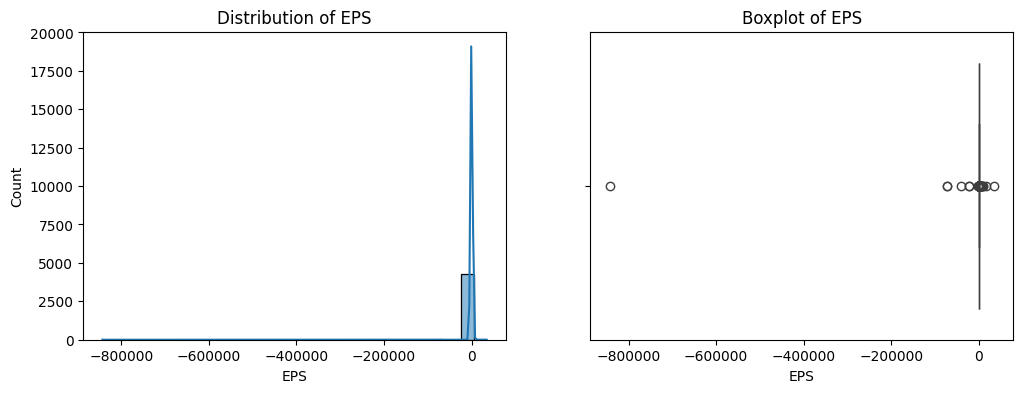

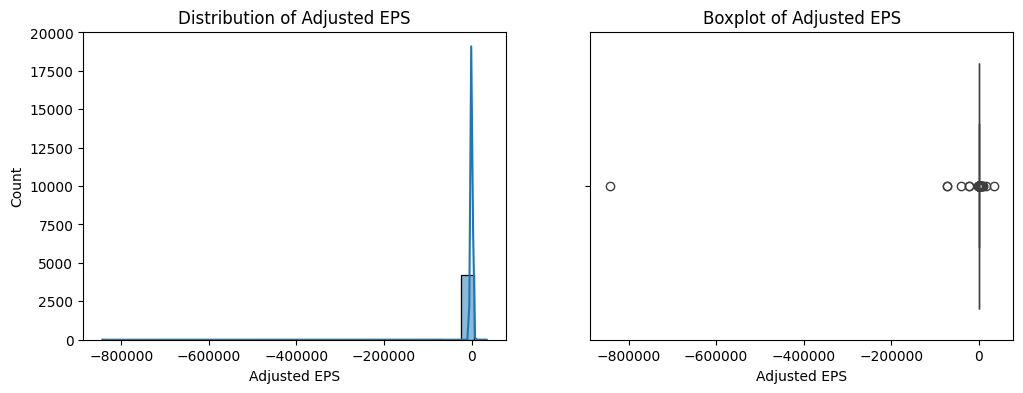

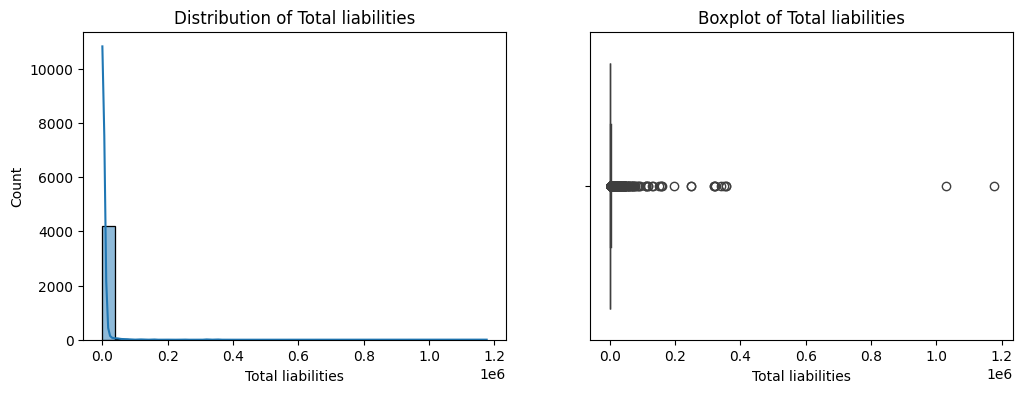

In [16]:
# Plot histograms & boxplots
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[col], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")

    plt.show()


### Multivariate Analysis (Correlations & Pairplots)


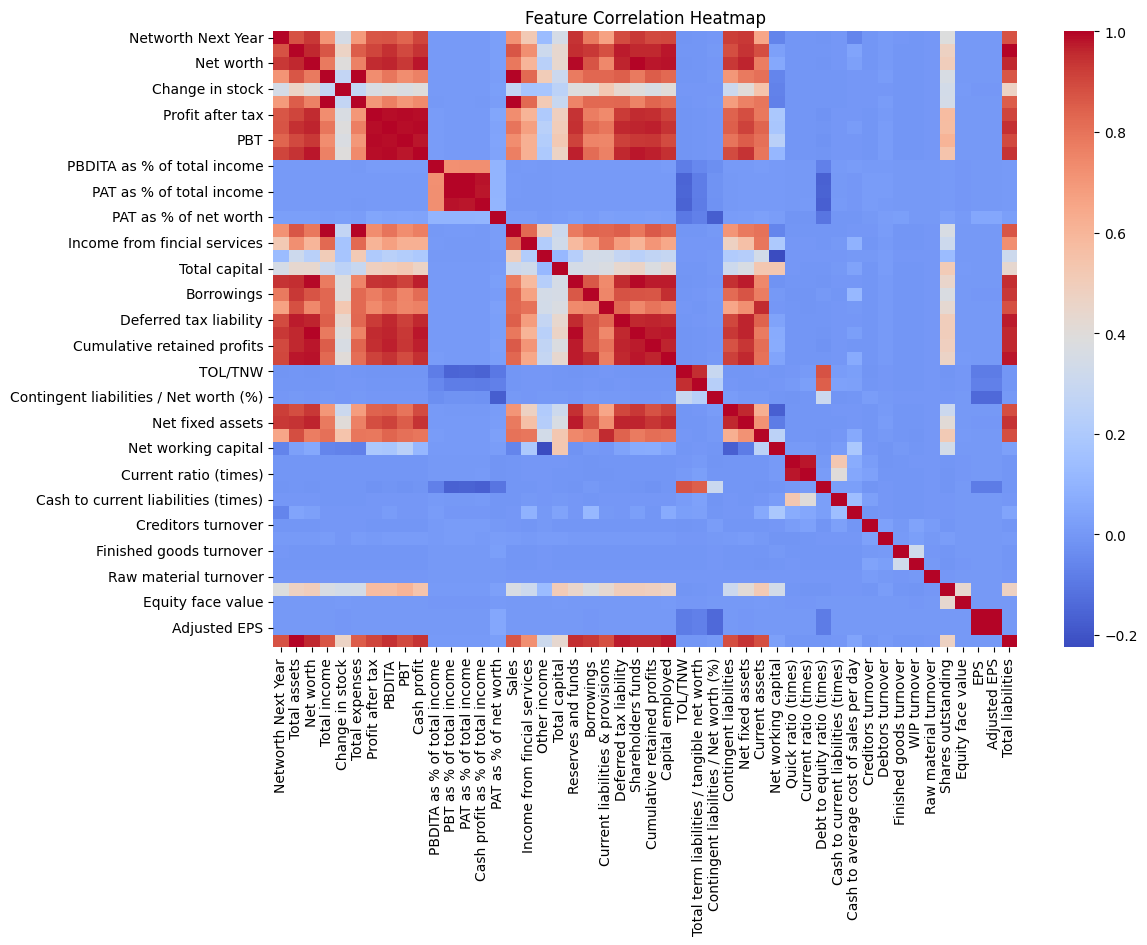

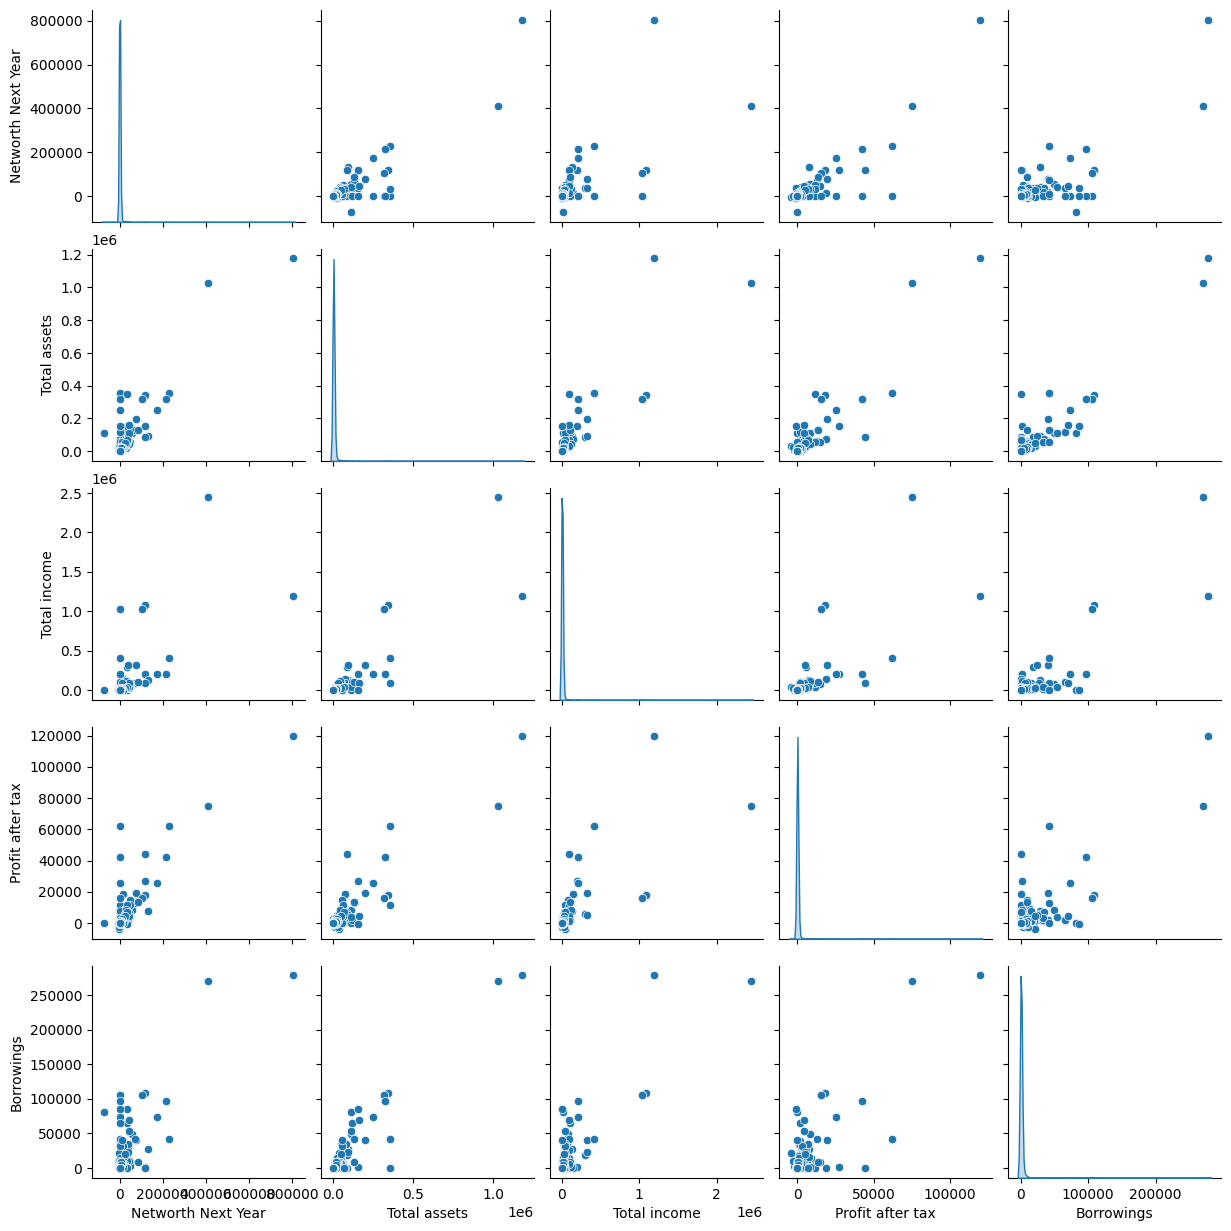

In [17]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot (Only for a few features due to size constraints)
selected_features = ["Networth Next Year", "Total assets", "Total income", "Profit after tax", "Borrowings"]
sns.pairplot(df[selected_features], diag_kind='kde')
plt.show()


## Step 3: Data Preprocessing

### Outlier Detection & Treatment (Using IQR)

In [18]:
df_X = df.drop('Networth Next Year', axis = 1)
df_Y = df['Networth Next Year']

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [20]:
for column in df_X.columns:
    lr,ur=remove_outlier(df[column])
    df_X[column]=np.where(df[column]>ur,ur,df[column])
    df_X[column]=np.where(df[column]<lr,lr,df[column])

In [21]:
df_processed = pd.concat([df_X, df_Y], axis = 1)

In [22]:
# Creating Target Variable (Default = 1 if Net Worth Next Year < 0)
df_processed['Default'] = np.where(df_processed['Networth Next Year'] < 0, 1, 0)
df_processed.drop(columns=['Networth Next Year'], inplace=True)

In [23]:
df_processed["Default"].value_counts()

,count
Default,
0,4022
1,234


In [24]:
# Checking proportion of default
df_processed.Default.sum() / len(df_processed.Default)

0.0549812030075188

### Splitting Data

In [25]:
X = df_processed.drop(columns=['Default'])
y = df_processed['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling Numerical Features

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 3: MODEL BUILDING

In [27]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    y_pred = model.predict(predictors)

    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    acc = accuracy_score(target, y_pred)  # to compute Accuracy
    recall = recall_score(target, y_pred)  # to compute Recall
    precision = precision_score(target, y_pred)  # to compute Precision
    f1 = f1_score(target, y_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [28]:
def model_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [29]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

In [30]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [31]:
# Model Evaluation
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       803
           1       0.67      0.12      0.21        49

    accuracy                           0.95       852
   macro avg       0.81      0.56      0.59       852
weighted avg       0.93      0.95      0.93       852


Random Forest Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       803
           1       0.50      0.24      0.33        49

    accuracy                           0.94       852
   macro avg       0.73      0.61      0.65       852
weighted avg       0.93      0.94      0.93       852



In [32]:
# ROC-AUC Scores
roc_log = roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:, 1])
roc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print("\nROC AUC - Logistic Regression:", roc_log)
print("ROC AUC - Random Forest:", roc_rf)


ROC AUC - Logistic Regression: 0.852885861692124
ROC AUC - Random Forest: 0.938915292144255


## Step 4: MODEL PERFORMANCE IMPROVEMENT

In [33]:
# Variance Inflation Factor (VIF) for Multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print("\nVariance Inflation Factors:\n", vif_data)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Variance Inflation Factors:
                                         Feature           VIF
0                                  Total assets           inf
1                                     Net worth  6.974451e+03
2                                  Total income  5.110869e+05
3                               Change in stock  1.213359e+01
4                                Total expenses  2.310597e+05
5                              Profit after tax  3.306303e+03
6                                        PBDITA  1.931741e+03
7                                           PBT  2.728177e+03
8                                   Cash profit  2.156550e+03
9                   PBDITA as % of total income  4.512432e+00
10                     PBT as % of total income  1.578724e+01
11                     PAT as % of total income  1.413811e+01
12             Cash profit as % of total income  3.984571e+00
13                        PAT as % of net worth  1.090913e+00
14                                      

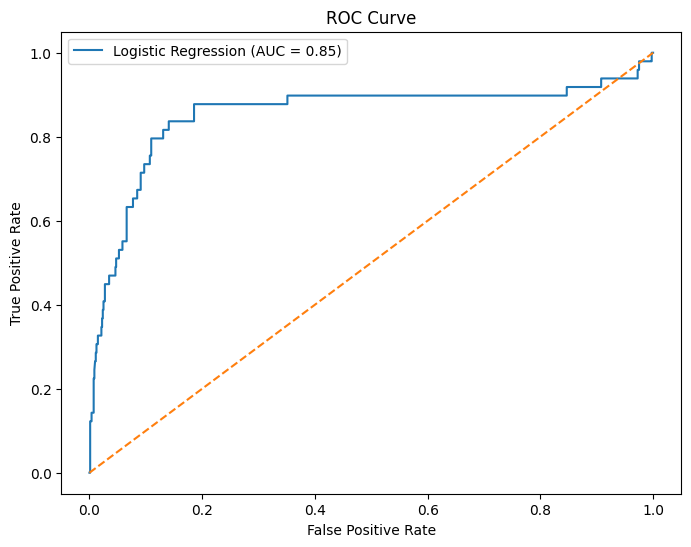

In [34]:
# ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, log_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_log))
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [35]:
# Hyperparameter Tuning for Random Forest
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

In [36]:
# Evaluate Best Random Forest Model
y_pred_best_rf = best_rf_model.predict(X_test)
print("\nTuned Random Forest Report:\n", classification_report(y_test, y_pred_best_rf))
roc_best_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
print("\nBest Random Forest ROC AUC:", roc_best_rf)


Tuned Random Forest Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       803
           1       0.50      0.24      0.33        49

    accuracy                           0.94       852
   macro avg       0.73      0.61      0.65       852
weighted avg       0.93      0.94      0.93       852


Best Random Forest ROC AUC: 0.9567311357918011


## Step 5: MODEL COMPARISON & FEATURE IMPORTANCE

In [37]:
# Compare Models
models = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Tuned Random Forest"],
    "ROC AUC": [roc_log, roc_rf, roc_best_rf]
})
print("\nModel Performance Comparison:\n", models)


Model Performance Comparison:
                  Model   ROC AUC
0  Logistic Regression  0.852886
1        Random Forest  0.938915
2  Tuned Random Forest  0.956731


In [38]:
# Feature Importance (Random Forest)
importances = best_rf_model.feature_importances_
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values(by="Importance", ascending=False)

<ipython-input-39-bd1ade45795a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.Importance[:10], y=feature_importance.Feature[:10], palette="viridis")


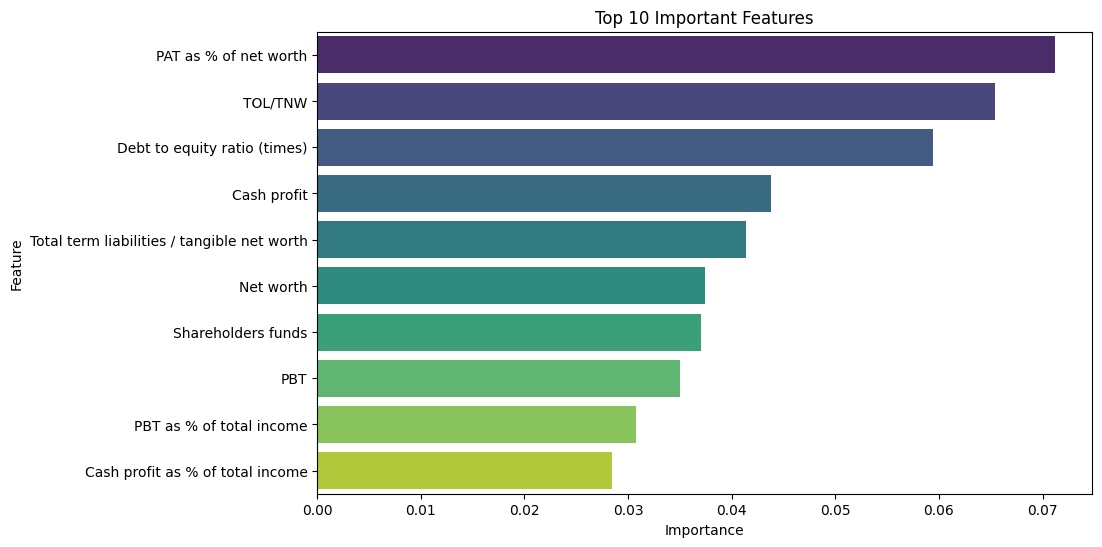

In [39]:
# Top 10 Important Features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.Importance[:10], y=feature_importance.Feature[:10], palette="viridis")
plt.title("Top 10 Important Features")
plt.show()

## Step 6: ACTIONABLE INSIGHTS & RECOMMENDATIONS

In [40]:
print("\nKey Takeaways:")
print("1. Logistic Regression gives an AUC of {:.2f}, while Random Forest improves it to {:.2f}.".format(roc_log, roc_rf))
print("2. Feature importance analysis shows key financial metrics impacting default risk.")
print("3. Credit risk teams should focus on companies with low Net Worth, high debt ratios, and low working capital.")
print("4. Implement proactive risk mitigation strategies such as early intervention for companies showing risk patterns.")


Key Takeaways:
1. Logistic Regression gives an AUC of 0.85, while Random Forest improves it to 0.94.
2. Feature importance analysis shows key financial metrics impacting default risk.
3. Credit risk teams should focus on companies with low Net Worth, high debt ratios, and low working capital.
4. Implement proactive risk mitigation strategies such as early intervention for companies showing risk patterns.
